In [2]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np 
import matplotlib.pyplot as plt
from pymatgen.core.lattice import Lattice

In [4]:
with MPRester("z18b57ZwfPDtXJVD") as m: 
    structure = m.get_phonon_bandstructure_by_material_id("mp-569779") #téléchargement de la structure

REPRESENTATION DE LA STRUCTURE DE BANDE DE PHONONS DU MATERIAU :


<module 'matplotlib.pyplot' from 'C:\\Users\\Admin\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

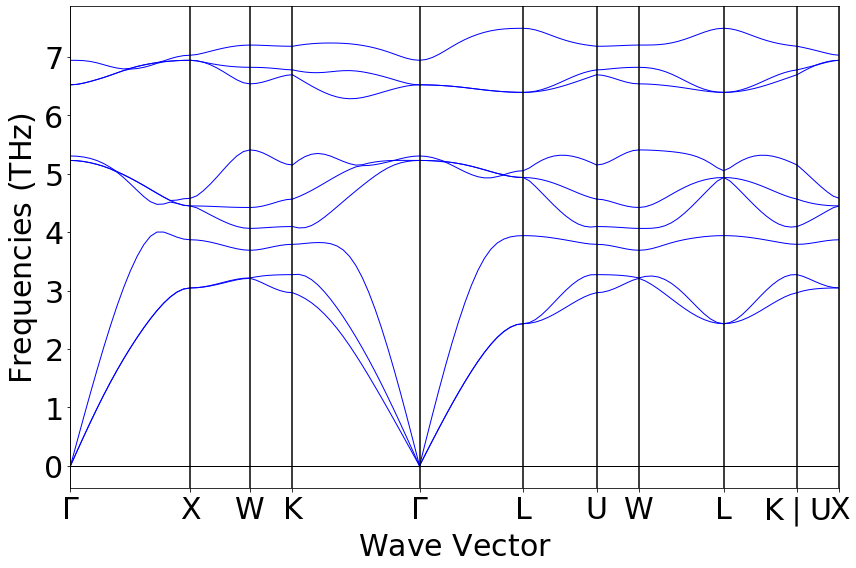

In [5]:
bsp = PhononBSPlotter(structure)
print("REPRESENTATION DE LA STRUCTURE DE BANDE DE PHONONS DU MATERIAU :")
bsp.get_plot()

Calcul de la vitesse du son :

L'étude des modes de vibrations d'une chaine atomique permet de définir une relation entre fréquence w, vecteur d'onde q et la vitesse du son v lorsque la norme des vecteurs d'ondes tend vers zéro (proche du point Γ).  
Nous trouvons alors v = |dw/dq| = 2*pi*|df/dq|. Avec les données fournies par Materials Project, nous pouvons tracer une fonction linéaires de la fréquence en fonction du vecteur d'onde : f(q) = a*q + b.
La vitesse du son de la branche acoustique numéro 1 dans la direction Γ - X vaut  2787.5596637802596  m/s et est représentée par la flèche rouge.
La vitesse du son de la branche acoustique numéro 0 dans la direction K - Γ vaut  2327.9132130305543  m/s et est représentée par la flèche verte.
La vitesse du son de la branche acoustique numéro 2 dans la direction Γ - L vaut  4971.088493828851  m/s et est représentée par la flèche orange.


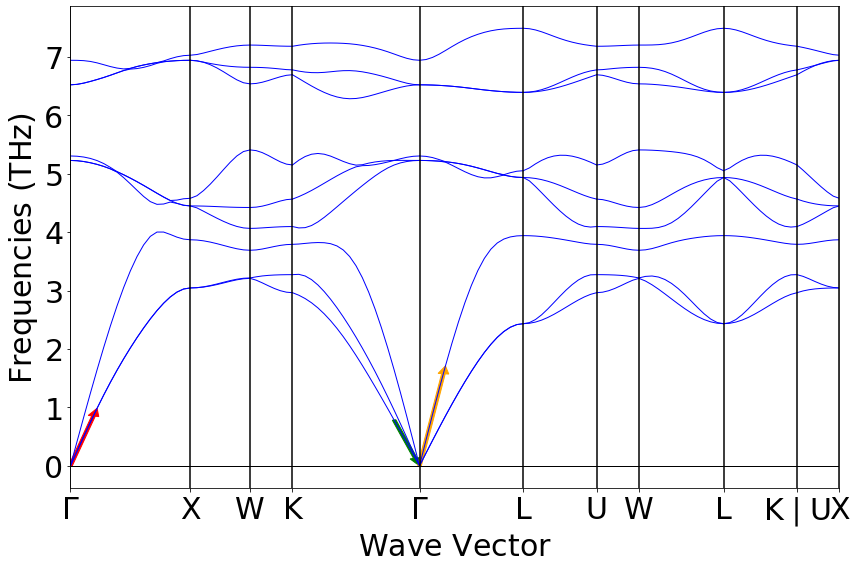

In [9]:
# Vitesse du son
print("Calcul de la vitesse du son :\n")
print("L'étude des modes de vibrations d'une chaine atomique permet de définir une relation entre fréquence w, vecteur d'onde q et la vitesse du son v lorsque la norme des vecteurs d'ondes tend vers zéro (proche du point Γ).  ")
print("Nous trouvons alors v = |dw/dq| = 2*pi*|df/dq|. Avec les données fournies par Materials Project, nous pouvons tracer une fonction linéaires de la fréquence en fonction du vecteur d'onde : f(q) = a*q + b.")

data = bsp.bs_plot_data()
distances = data.get("distances") #obtention des vecteurs d'onde q le long de tous les chemins
frequencies = data.get("frequency") #obtention des fréquences associées aux vercteurs d'ondes q

#print(distances)

d1 = distances[0]
f1 = frequencies[0][1]
x1 = distances[0][4] - distances[0][0]
y1 = f1[4] - f1[0]
v1 = 2*np.pi * abs(y1)*10**12*10**(-10)/x1 #changement d'unité et calcul de la vitesse du son
print("La vitesse du son de la branche acoustique numéro 1 dans la direction Γ - X vaut ", v1, " m/s et est représentée par la flèche rouge.")

d2 = distances[3]
f2 = frequencies[3][0]
x2 = d2[-1] - d2[-5]
y2 = f2[-1] - f2[-5]
v2 = 2*np.pi * abs(y2)*10**12*10**(-10)/x2 #changement d'unité et calcul de la vitesse du son
print("La vitesse du son de la branche acoustique numéro 0 dans la direction K - Γ vaut ", v2, " m/s et est représentée par la flèche verte.")

d3 = distances[4]
f3 = frequencies[4][2]
x3 = d3[4] - d3[0]
y3 = f3[4] - f3[0]
v3 = 2*np.pi * abs(y3)*10**12*10**(-10)/x3 #changement d'unité et calcul de la vitesse du son
print("La vitesse du son de la branche acoustique numéro 2 dans la direction Γ - L vaut ", v3, " m/s et est représentée par la flèche orange.")

bsp.get_plot()
plt.arrow(d1[0], f1[0], x1, y1, color = 'red', width = 0.03, length_includes_head = True)
plt.arrow(d2[-5], f2[-5], x2, y2, color = 'green', width = 0.03, length_includes_head = True)
plt.arrow(d3[0], f3[0], x3, y3, color = 'orange', width = 0.03, length_includes_head = True)
plt.show()